In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import cv2
import pywt
from os import listdir
from os.path import isfile, join
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [3]:
face_detector = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
eye_detector = cv2.CascadeClassifier('./haarcascade_eye.xml')

In [4]:
def get_cropped_img(img_path) :
    img = cv2.imread(img_path)
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray_img,1.3,5)
    final_faces = []
    for (x,y,w,h) in faces :
        r_gray = gray_img[y:y+h,x:x+w]
        r_color = img[y:y+h,x:x+w]
        eye = eye_detector.detectMultiScale(r_gray)
        if len(eye) >= 2 :
            final_faces.append(r_color)
    return final_faces 

In [5]:
def dir_array_to_data(dir_path) :
    img_dir = []
    for i in os.scandir(dir_path) :
        if i.is_dir() :
            img_dir.append(i.path)
    return img_dir

In [6]:
dir_names = dir_array_to_data('./image_dataset/')
dir_names.pop(0)
dir_names

['./image_dataset/lionel_messi',
 './image_dataset/maria_sharapova',
 './image_dataset/roger_federer',
 './image_dataset/serena_williams',
 './image_dataset/virat_kohli']

In [10]:
## For creating cropped imges



# for img_dir in dir_names :
#     count = 1
#     name = img_dir.split('/')[-1]
#     print('Celebrity name : '+name)
#     for i in os.scandir(img_dir) :
#         r_color_arr = get_cropped_img(i.path)
#         cropped_folder = './image_dataset/cropped/'+name
#         if not os.path.exists(cropped_folder):
#             os.makedirs(cropped_folder)
           
#             print('Generating cropped images in folder : '+cropped_folder)
#         for i in r_color_arr :
#             cropped_file_name = name+str(count)+'.png'
#             cropped_img_path = cropped_folder+'/'+cropped_file_name
#             cv2.imwrite(cropped_img_path,i)
          
#             count+=1




Celebrity name : cropped
Celebrity name : lionel_messi
Generating cropped images in folder : ./image_dataset/cropped/lionel_messi
Celebrity name : maria_sharapova
Generating cropped images in folder : ./image_dataset/cropped/maria_sharapova
Celebrity name : roger_federer
Generating cropped images in folder : ./image_dataset/cropped/roger_federer
Celebrity name : serena_williams
Generating cropped images in folder : ./image_dataset/cropped/serena_williams
Celebrity name : virat_kohli
Generating cropped images in folder : ./image_dataset/cropped/virat_kohli


In [7]:
   

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

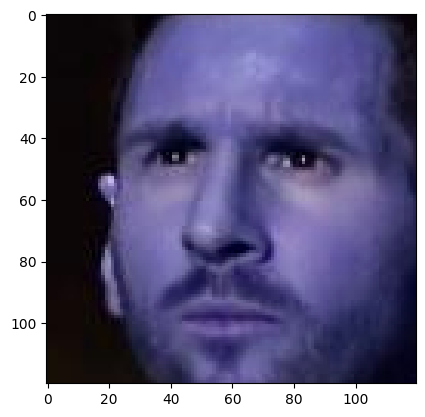

In [8]:
img = cv2.imread('./image_dataset/cropped/lionel_messi/lionel_messi10.png')
plt.imshow(img)

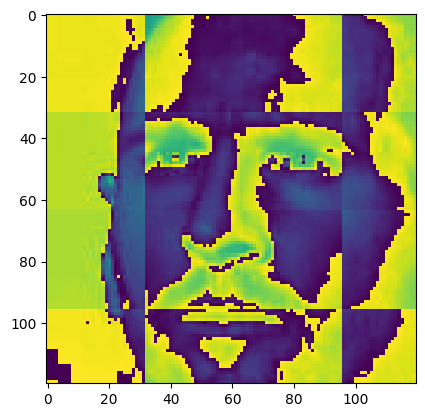

In [9]:
a = np.array(img)
img_2 = w2d(a,'db1',5)
plt.imshow(img_2)

In [10]:

img = cv2.imread('./image_dataset/cropped/lionel_messi/lionel_messi1.png')
cropped_img = np.array(img)
im_har = w2d(cropped_img,'db1',5)
# plt.imshow(im_har, cmap='gray')
print(im_har)


[[ 11  29  12 ... 228 228 228]
 [236   4  22 ... 228 227 227]
 [199 230  59 ... 228 226 226]
 ...
 [244 244 245 ... 232 234 234]
 [244 244 245 ... 232 234 234]
 [244 244 245 ... 232 234 234]]


In [11]:
celebrity_names = []
for i in dir_names :
    celebrity_names.append(i.split('/')[-1])
celebrity_names

['lionel_messi',
 'maria_sharapova',
 'roger_federer',
 'serena_williams',
 'virat_kohli']

In [12]:

Celebrity_file_names_dict = {}
class_dict = {}
count = 0

for i in celebrity_names :
    files_path = './image_dataset/cropped/'+i
    Celebrity_file_names_dict[i] = [files_path+'/'+f for f in listdir(files_path) if isfile(join(files_path, f))]
    class_dict[i] = count
    count+=1
   



In [13]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [14]:
Celebrity_file_names_dict

{'lionel_messi': ['./image_dataset/cropped/lionel_messi/lionel_messi1.png',
  './image_dataset/cropped/lionel_messi/lionel_messi10.png',
  './image_dataset/cropped/lionel_messi/lionel_messi11.png',
  './image_dataset/cropped/lionel_messi/lionel_messi12.png',
  './image_dataset/cropped/lionel_messi/lionel_messi15.png',
  './image_dataset/cropped/lionel_messi/lionel_messi16.png',
  './image_dataset/cropped/lionel_messi/lionel_messi17.png',
  './image_dataset/cropped/lionel_messi/lionel_messi18.png',
  './image_dataset/cropped/lionel_messi/lionel_messi19.png',
  './image_dataset/cropped/lionel_messi/lionel_messi2.png',
  './image_dataset/cropped/lionel_messi/lionel_messi20.png',
  './image_dataset/cropped/lionel_messi/lionel_messi21.png',
  './image_dataset/cropped/lionel_messi/lionel_messi22.png',
  './image_dataset/cropped/lionel_messi/lionel_messi23.png',
  './image_dataset/cropped/lionel_messi/lionel_messi25.png',
  './image_dataset/cropped/lionel_messi/lionel_messi26.png',
  './image

In [15]:
x,y=[],[]
for name , file_list in Celebrity_file_names_dict.items() :

    for file_name in file_list :
      
        img = cv2.imread(file_name)
       
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(cropped_img,'db1',5)
        scalled_har_img = cv2.resize(im_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_har_img.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[name])

In [16]:
X = np.array(x).reshape(len(x),4096).astype(float)
X.shape

(183, 4096)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [18]:
pipe = Pipeline([('scalar',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.8695652173913043

In [19]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.92      1.00      0.96        11
           2       1.00      0.62      0.77         8
           3       0.75      1.00      0.86         6
           4       0.83      0.91      0.87        11

    accuracy                           0.87        46
   macro avg       0.88      0.87      0.86        46
weighted avg       0.88      0.87      0.87        46



In [20]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10,20,30,40,50,90,100]
        }
    }
}

In [22]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [23]:
scores

[{'model': 'svm',
  'best_score': 0.8174603174603174,
  'best_params': {'svc__C': 1, 'svc__kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.7018518518518518,
  'best_params': {'randomforestclassifier__n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.8833333333333334,
  'best_params': {'logisticregression__C': 5}}]

In [24]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [25]:
best_estimators['svm'].score(x_test,y_test)

0.8478260869565217

In [26]:
best_estimators['random_forest'].score(x_test,y_test)

0.7608695652173914

In [27]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8695652173913043

In [29]:
best_clf = best_estimators['logistic_regression']

In [30]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,best_clf.predict(x_test))

In [31]:
c

array([[ 9,  0,  0,  0,  1],
       [ 0, 11,  0,  0,  0],
       [ 0,  1,  5,  1,  1],
       [ 0,  0,  0,  6,  0],
       [ 1,  0,  1,  0,  9]], dtype=int64)

In [32]:
sv = best_estimators['svm']

In [33]:
confusion_matrix(y_test,sv.predict(x_test))

array([[ 8,  0,  0,  0,  2],
       [ 0, 11,  0,  0,  0],
       [ 0,  1,  5,  2,  0],
       [ 0,  0,  0,  6,  0],
       [ 2,  0,  0,  0,  9]], dtype=int64)

In [35]:
import joblib

In [36]:
joblib.dump(best_clf,'model.pkl')

['model.pkl']

In [ ]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))